In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Exercise 1


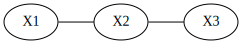

In [ ]:
from graphviz import Graph

g = Graph()
g.attr(rankdir='LR')
g.edge('X1', 'X2')
g.edge('X2', 'X3')
g

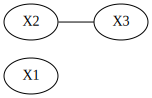

In [ ]:
g = Graph()
g.attr(rankdir='LR')
g.node('X1')
g.edge('X2', 'X3')

g

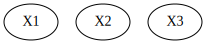

In [ ]:
g = Graph()

g.node('X1')
g.node('X2')
g.node('X3')

g

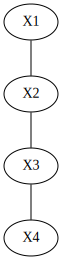

In [ ]:
g = Graph()

g.edge('X2', 'X3')
g.edge('X1', 'X2')
g.edge('X3', 'X4')

g


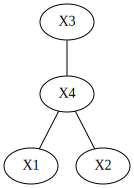

In [ ]:
g = Graph()
g.edge('X3', 'X4')
g.edge('X4', 'X1')
g.edge('X4', 'X2')

g

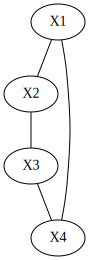

In [ ]:
g = Graph()
g.edge('X1', 'X2')
g.edge('X2', 'X3')
g.edge('X3', 'X4')
g.edge('X1', 'X4')
g

Exercise 4

Given that $ X_1 $, $ X_2 $, and $ X_3 $ are binary random variables, let's denote:

- $ p_{11} $: Probability of $ X_1 = 1 $ and $ X_2 = 1 $ given $ X_3 $
- $ p_{10} $: Probability of $ X_1 = 1 $ and $ X_2 = 0 $ given $ X_3 $
- $ p_{01} $: Probability of $ X_1 = 0 $ and $ X_2 = 1 $ given $ X_3 $
- $ p_{00} $: Probability of $ X_1 = 0 $ and $ X_2 = 0 $ given $ X_3 $

The likelihood under $ H_0 $ is:
$ L_0 = p_{11}^{n_{11}} \cdot (1 - p_{11})^{n_{10}} \cdot p_{10}^{n_{01}} \cdot (1 - p_{10})^{n_{00}} $

where $ n_{11} $, $ n_{10} $, $ n_{01} $, and $ n_{00} $ are observed frequencies corresponding to the combinations of $ X_1 $ and $ X_2 $ given $ X_3 $.

Under $ H_1 $, we estimate the probabilities of $ X_1 $ and $ X_2 $ separately, without conditioning on $ X_3 $, and use these estimates to compute the likelihood. Let $ p_1 $ be the probability of $ X_1 = 1 $ and $ p_2 $ be the probability of $ X_2 = 1 $.

The likelihood under $ H_1 $ is:
$ L_1 = p_1^{n_{1}} \cdot (1 - p_1)^{n_{0}} \cdot p_2^{n_{2}} \cdot (1 - p_2)^{n_{3}} $

where $ n_{1} $, $ n_{0} $, $ n_{2} $, and $ n_{3} $ are observed frequencies corresponding to the combinations of $ X_1 $ and $ X_2 $.

Then, the likelihood ratio test statistic is given by:
$ \lambda = \frac{L_1}{L_0} $

Under $H_0$ we assume that $X_1$ and $X_2$ are independent given $X_3$. The model has $3$ parameters: $p_{11}$ $p_{10}$ and $p_{01}$ because $p_{00}$ can be obtained from the condition $p_{11} + p_{10} + p_{01} + p_{00} = 1$. So, we estimate $3$ parameters under $H_0$.

Under $H_1$, where $X_1$ is not independent of $X_2$ given $X_3$, we estimate $2$ parameters: $p_1$, $p_2$.

So, the degrees of freedom for the chi-squared distribution would be $df=3−2=1$. Therefore, we can use a 1 degree of freedom Chi square distribution. We reject the null if $ \lambda > \chi_{1}^{2}(.95) $







Exercise 5

In [ ]:
X = np.array([[[35, 59], [47, 112]], [[42, 77], [26, 76]]])
X

array([[[ 35,  59],
        [ 47, 112]],

       [[ 42,  77],
        [ 26,  76]]])

In [ ]:
p_mle_multinomial = X / np.sum(X)
p_mle_multinomial

array([[[0.07383966, 0.12447257],
        [0.09915612, 0.23628692]],

       [[0.08860759, 0.16244726],
        [0.05485232, 0.16033755]]])

In [ ]:
b_glam_death = X[1, 1, 0]
b_glam_total = np.sum(X[1, 1, :])
p_death_given_glam_benign = b_glam_death / b_glam_total
se = np.sqrt((p_death_given_glam_benign * (1 - p_death_given_glam_benign)) / b_glam_total)
p_death_given_glam_benign, se

(0.2549019607843137, 0.04315123327397445)

In [ ]:
from scipy.stats import chi2

